In [1]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from tensorflow.keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image


2021-09-18 15:13:37.683224: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-18 15:13:37.683242: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
X=[] #list of images
Z=[] #list of labels
IMG_SIZE=150
CARS_DIR='../../datasets/level_1/cars'
HUMAN_DIR='../../datasets/level_1/human'

In [3]:
#Making the functions to get the training and validation set from the Images

def assign_label(img,class_type):
    return class_type

In [4]:
def make_train_data(class_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,class_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
    print(X)
    print(Z)

In [5]:
make_train_data('cars' ,CARS_DIR)
print(len(X))

100%|█████████████████████████████████████████████████| 420/420 [00:00<00:00, 2726.08it/s]

[array([[[153, 195, 208],
        [152, 196, 209],
        [154, 196, 211],
        ...,
        [170, 172, 173],
        [168, 170, 170],
        [165, 168, 168]],

       [[153, 197, 211],
        [156, 198, 208],
        [150, 194, 208],
        ...,
        [181, 179, 179],
        [177, 176, 176],
        [175, 174, 174]],

       [[156, 198, 212],
        [157, 195, 210],
        [155, 196, 213],
        ...,
        [175, 176, 175],
        [176, 177, 177],
        [175, 177, 177]],

       ...,

       [[189, 186, 187],
        [173, 170, 170],
        [169, 166, 167],
        ...,
        [172, 161, 158],
        [176, 167, 164],
        [172, 163, 162]],

       [[205, 202, 198],
        [198, 195, 191],
        [194, 191, 190],
        ...,
        [197, 192, 188],
        [177, 172, 170],
        [188, 181, 180]],

       [[204, 198, 197],
        [204, 199, 198],
        [205, 197, 197],
        ...,
        [170, 164, 159],
        [163, 157, 152],
        [168, 161, 156]

In [6]:
make_train_data('human', HUMAN_DIR)
print(len(X))

100%|██████████████████████████████████████████████████| 202/202 [00:00<00:00, 977.64it/s]


[array([[[153, 195, 208],
        [152, 196, 209],
        [154, 196, 211],
        ...,
        [170, 172, 173],
        [168, 170, 170],
        [165, 168, 168]],

       [[153, 197, 211],
        [156, 198, 208],
        [150, 194, 208],
        ...,
        [181, 179, 179],
        [177, 176, 176],
        [175, 174, 174]],

       [[156, 198, 212],
        [157, 195, 210],
        [155, 196, 213],
        ...,
        [175, 176, 175],
        [176, 177, 177],
        [175, 177, 177]],

       ...,

       [[189, 186, 187],
        [173, 170, 170],
        [169, 166, 167],
        ...,
        [172, 161, 158],
        [176, 167, 164],
        [172, 163, 162]],

       [[205, 202, 198],
        [198, 195, 191],
        [194, 191, 190],
        ...,
        [197, 192, 188],
        [177, 172, 170],
        [188, 181, 180]],

       [[204, 198, 197],
        [204, 199, 198],
        [205, 197, 197],
        ...,
        [170, 164, 159],
        [163, 157, 152],
        [168, 161, 156]

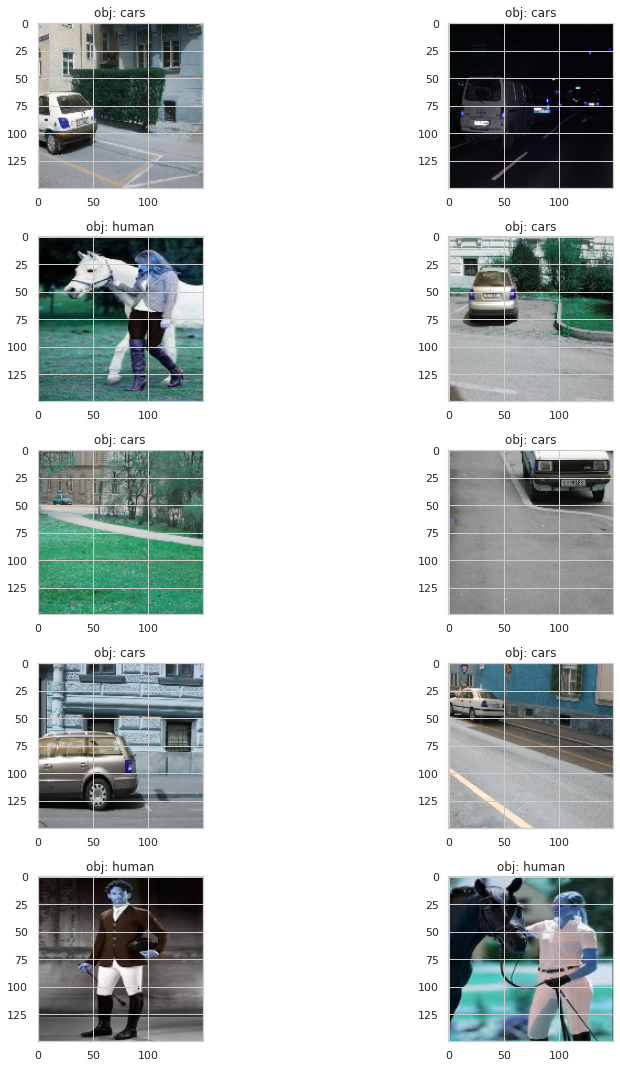

In [7]:
#Visualizing some Random Images

fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)
for i in range(5):
    for j in range(2):
        l = rn.randint(0, len(Z))
        ax[i, j].imshow(X[l])
        ax[i, j].set_title('obj: '+ Z[l])
        
plt.tight_layout()

In [8]:
le = LabelEncoder()
Y = le.fit_transform(Z)
print(Y)
print(len(Y))
Y = to_categorical(Y, 2) 
print(Y)
print(len(Y))
#print(X)
X = np.array(X)
#print(X)
X = X/255
print(X)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [9]:
# Y is binary matrix of index
# X is list of images
# Z is list of labels


# Split arrays or matrices into random train and test subsets
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=42
                                                   )
print(x_train)
print(x_test)
print(y_train)
print(y_test
     )


[[[[0.29803922 0.29019608 0.23921569]
   [0.30196078 0.30588235 0.26666667]
   [0.32156863 0.31764706 0.27058824]
   ...
   [0.03921569 0.03529412 0.03529412]
   [0.04313725 0.05098039 0.05098039]
   [0.04705882 0.04313725 0.03529412]]

  [[0.30196078 0.29803922 0.25882353]
   [0.30196078 0.32156863 0.30196078]
   [0.30588235 0.33333333 0.30980392]
   ...
   [0.04313725 0.0627451  0.05882353]
   [0.05098039 0.05490196 0.05490196]
   [0.05098039 0.04705882 0.04705882]]

  [[0.30196078 0.30588235 0.28627451]
   [0.31372549 0.3254902  0.30588235]
   [0.30980392 0.3372549  0.32156863]
   ...
   [0.04705882 0.07843137 0.0627451 ]
   [0.05098039 0.05490196 0.05490196]
   [0.05490196 0.07058824 0.05882353]]

  ...

  [[0.38823529 0.39215686 0.40392157]
   [0.37254902 0.38039216 0.37647059]
   [0.47058824 0.47843137 0.45882353]
   ...
   [0.36862745 0.37254902 0.38039216]
   [0.47843137 0.47843137 0.47058824]
   [0.41176471 0.40784314 0.41960784]]

  [[0.43529412 0.43137255 0.43529412]
   [0.3

In [10]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [11]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),
                 padding = 'Same',activation ='relu',
                 input_shape = (150,150,3)))

model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),
                 padding = 'Same',activation ='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),
                 padding = 'Same',activation ='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Conv2D(filters = 96, kernel_size = (3,3),
                 padding = 'Same',activation ='relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(2, activation = "softmax"))

2021-09-18 15:13:47.582643: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-09-18 15:13:47.583096: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-09-18 15:13:47.583167: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2021-09-18 15:13:47.583219: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2021-09-18 15:13:47.583266: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

In [12]:
batch_size = 128
epochs = 50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor= 'val_acc', patience= 3,
                            verbose= 1, factor= 0.1)

In [13]:
#Data Augmentation to prevent Overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [14]:
# Compiling the Keras Model & Summary

model.compile(optimizer= Adam(lr=0.001),
              loss= 'categorical_crossentropy',
              metrics= ['accuracy']
                 )

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)        8

In [16]:
# Fitting on the Training set and making predcitons on the Validation set


History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (x_test,y_test),
                              verbose = 1,
                              steps_per_epoch=x_train.shape[0] // batch_size)

# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

2021-09-18 15:13:55.001360: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
3/3 [==============================] - 8s 2s/step - loss: 0.7236 - accuracy: 0.5592 - val_loss: 0.6745 - val_accuracy: 0.8526
Epoch 2/50
3/3 [==============================] - 7s 3s/step - loss: 0.6635 - accuracy: 0.6834 - val_loss: 0.5836 - val_accuracy: 0.7179
Epoch 3/50
3/3 [==============================] - 7s 2s/step - loss: 0.5856 - accuracy: 0.7071 - val_loss: 0.8535 - val_accuracy: 0.2949
Epoch 4/50
3/3 [==============================] - 8s 3s/step - loss: 0.6742 - accuracy: 0.5703 - val_loss: 0.4856 - val_accuracy: 0.7308
Epoch 5/50
3/3 [==============================] - 8s 2s/step - loss: 0.5310 - accuracy: 0.7663 - val_loss: 0.4645 - val_accuracy: 0.8141
Epoch 6/50
3/3 [==============================] - 7s 2s/step - loss: 0.4573 - accuracy: 0.8195 - val_loss: 0.3496 - val_accuracy: 0.8141
Epoch 7/50
3/3 [==============================] - 8s 3s/step - loss: 0.3878 - accuracy: 0.8229 - val_loss: 0.4418 - val_accuracy: 0.8397
Epoch 8/50
3/3 [=========================

In [21]:
model.save("../../model_level1")

# serialize model to JSON
model_json = model.to_json()
with open("../../model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

INFO:tensorflow:Assets written to: ../../model_level1/assets
Saved model to disk


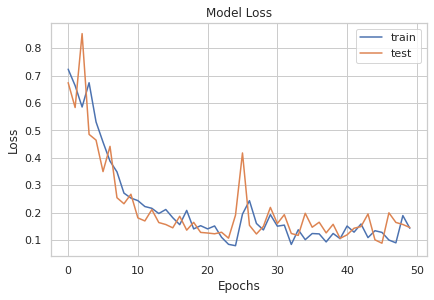

In [22]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

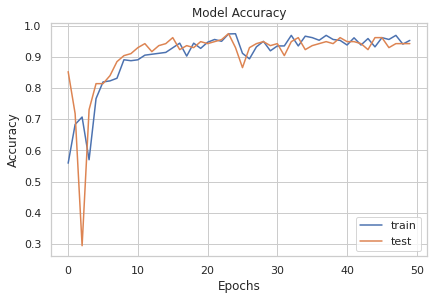

In [23]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [24]:
# getting predictions on val set.
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

In [25]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

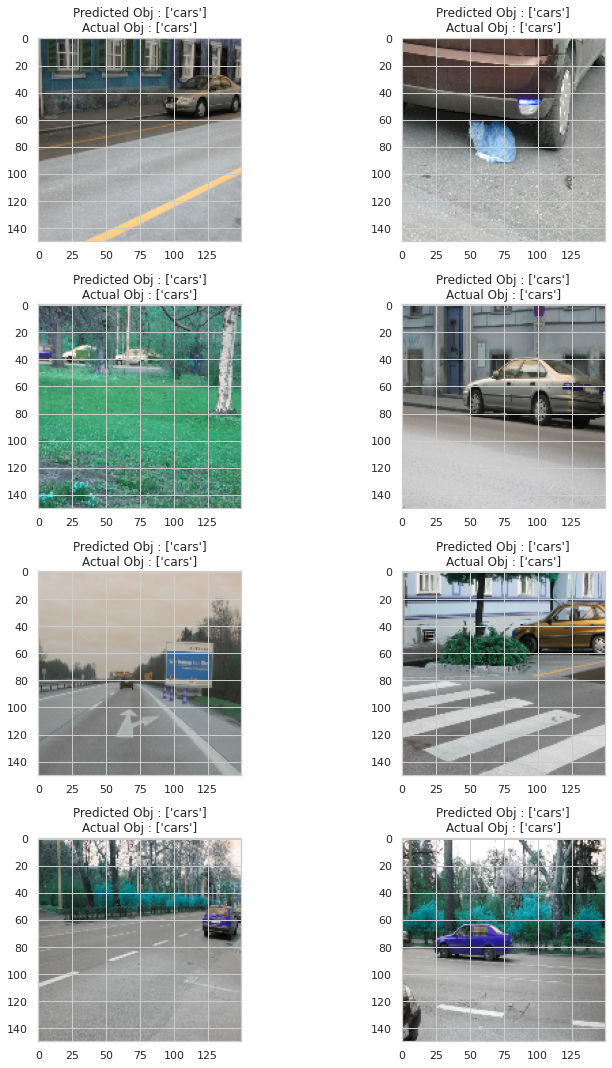

In [26]:
count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Obj : "+
        str(le.inverse_transform([pred_digits[prop_class[count]]]))+
        "\n"+"Actual Obj : "+
        str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

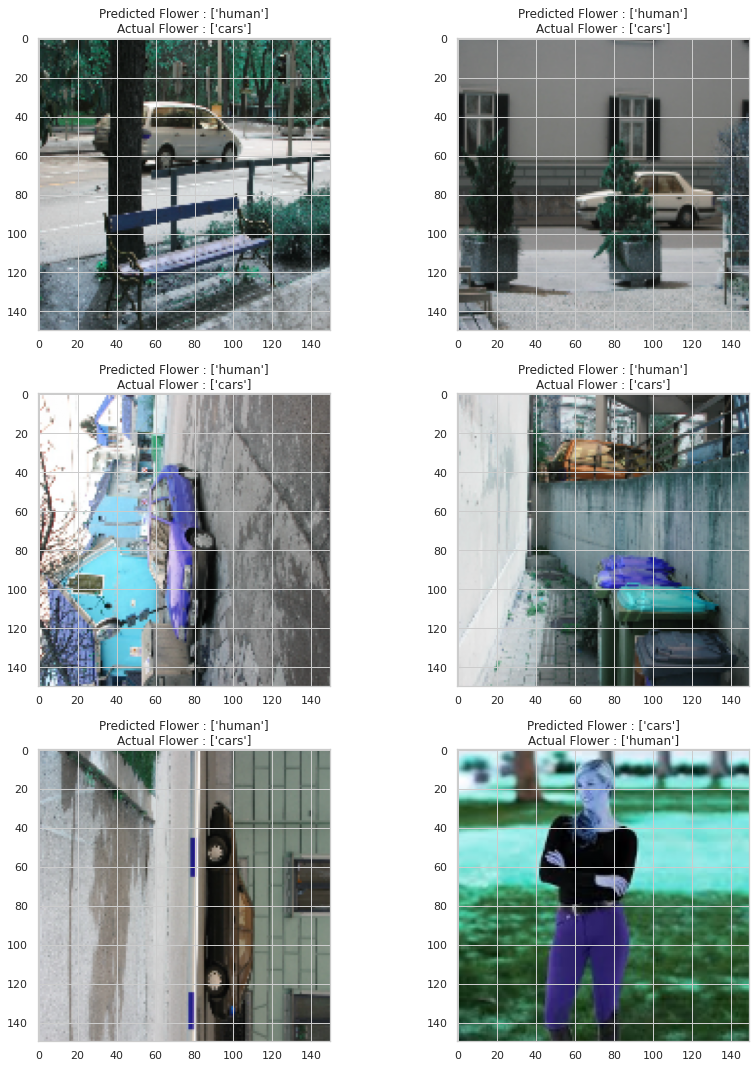

In [27]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(3,2)
fig.set_size_inches(15,15)
for i in range (3):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Flower : "+
        str(le.inverse_transform([pred_digits[mis_class[count]]]))+
        "\n"+"Actual Flower : "+
        str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1
